# MICROSOFT ENTRY INTO THE MOVIE PRODUCTION INDUSTRY
Please fill out:
* Student name: Josphat Njuguna Wanjiru
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Samuel Mwangi 
* Blog post URL:

## PROJECT OVERVIEW

This project is on exploratory data analysis to generate insights for a business stakeholder in detgermining what type of movies to consider upon setting up a movie studio



## BUISNESS PROBLEM

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

## OBJECTIVE
### Main Objective
To analyze current film industry trends to provide actionable insights for Microsoft’s new movie studio, guiding the decision-making process on the types of films to produce for successful box office performance.

### Specific Objectives
The specific objectives are to: 
* Determinining the type or genre of movies with the highest income ranges 
* Combine dataset from two sources to enrich the dataset for analysis using JOIN feature in SQL for SQLITE DB and Merge for dataframes
* Clean the dataset
* Synthesize findings into strategic recommendations for Microsoft’s film studio, focusing on optimal genres, target audiences, and production techniques for maximizing box office success.
Practice calculating measures of centrality and dispersion with pandas


## DATA

The data set used for the exploratory data analysis are
* IMDB
* Box Office Mojo

The data was collected from various locations they have the files have different formats. The Box Office Mojo is in CSV (comma-separated values) format whereas IMDB is an sqlite database. The Entity Relational Diagram for the sqlite database is as shown below: 


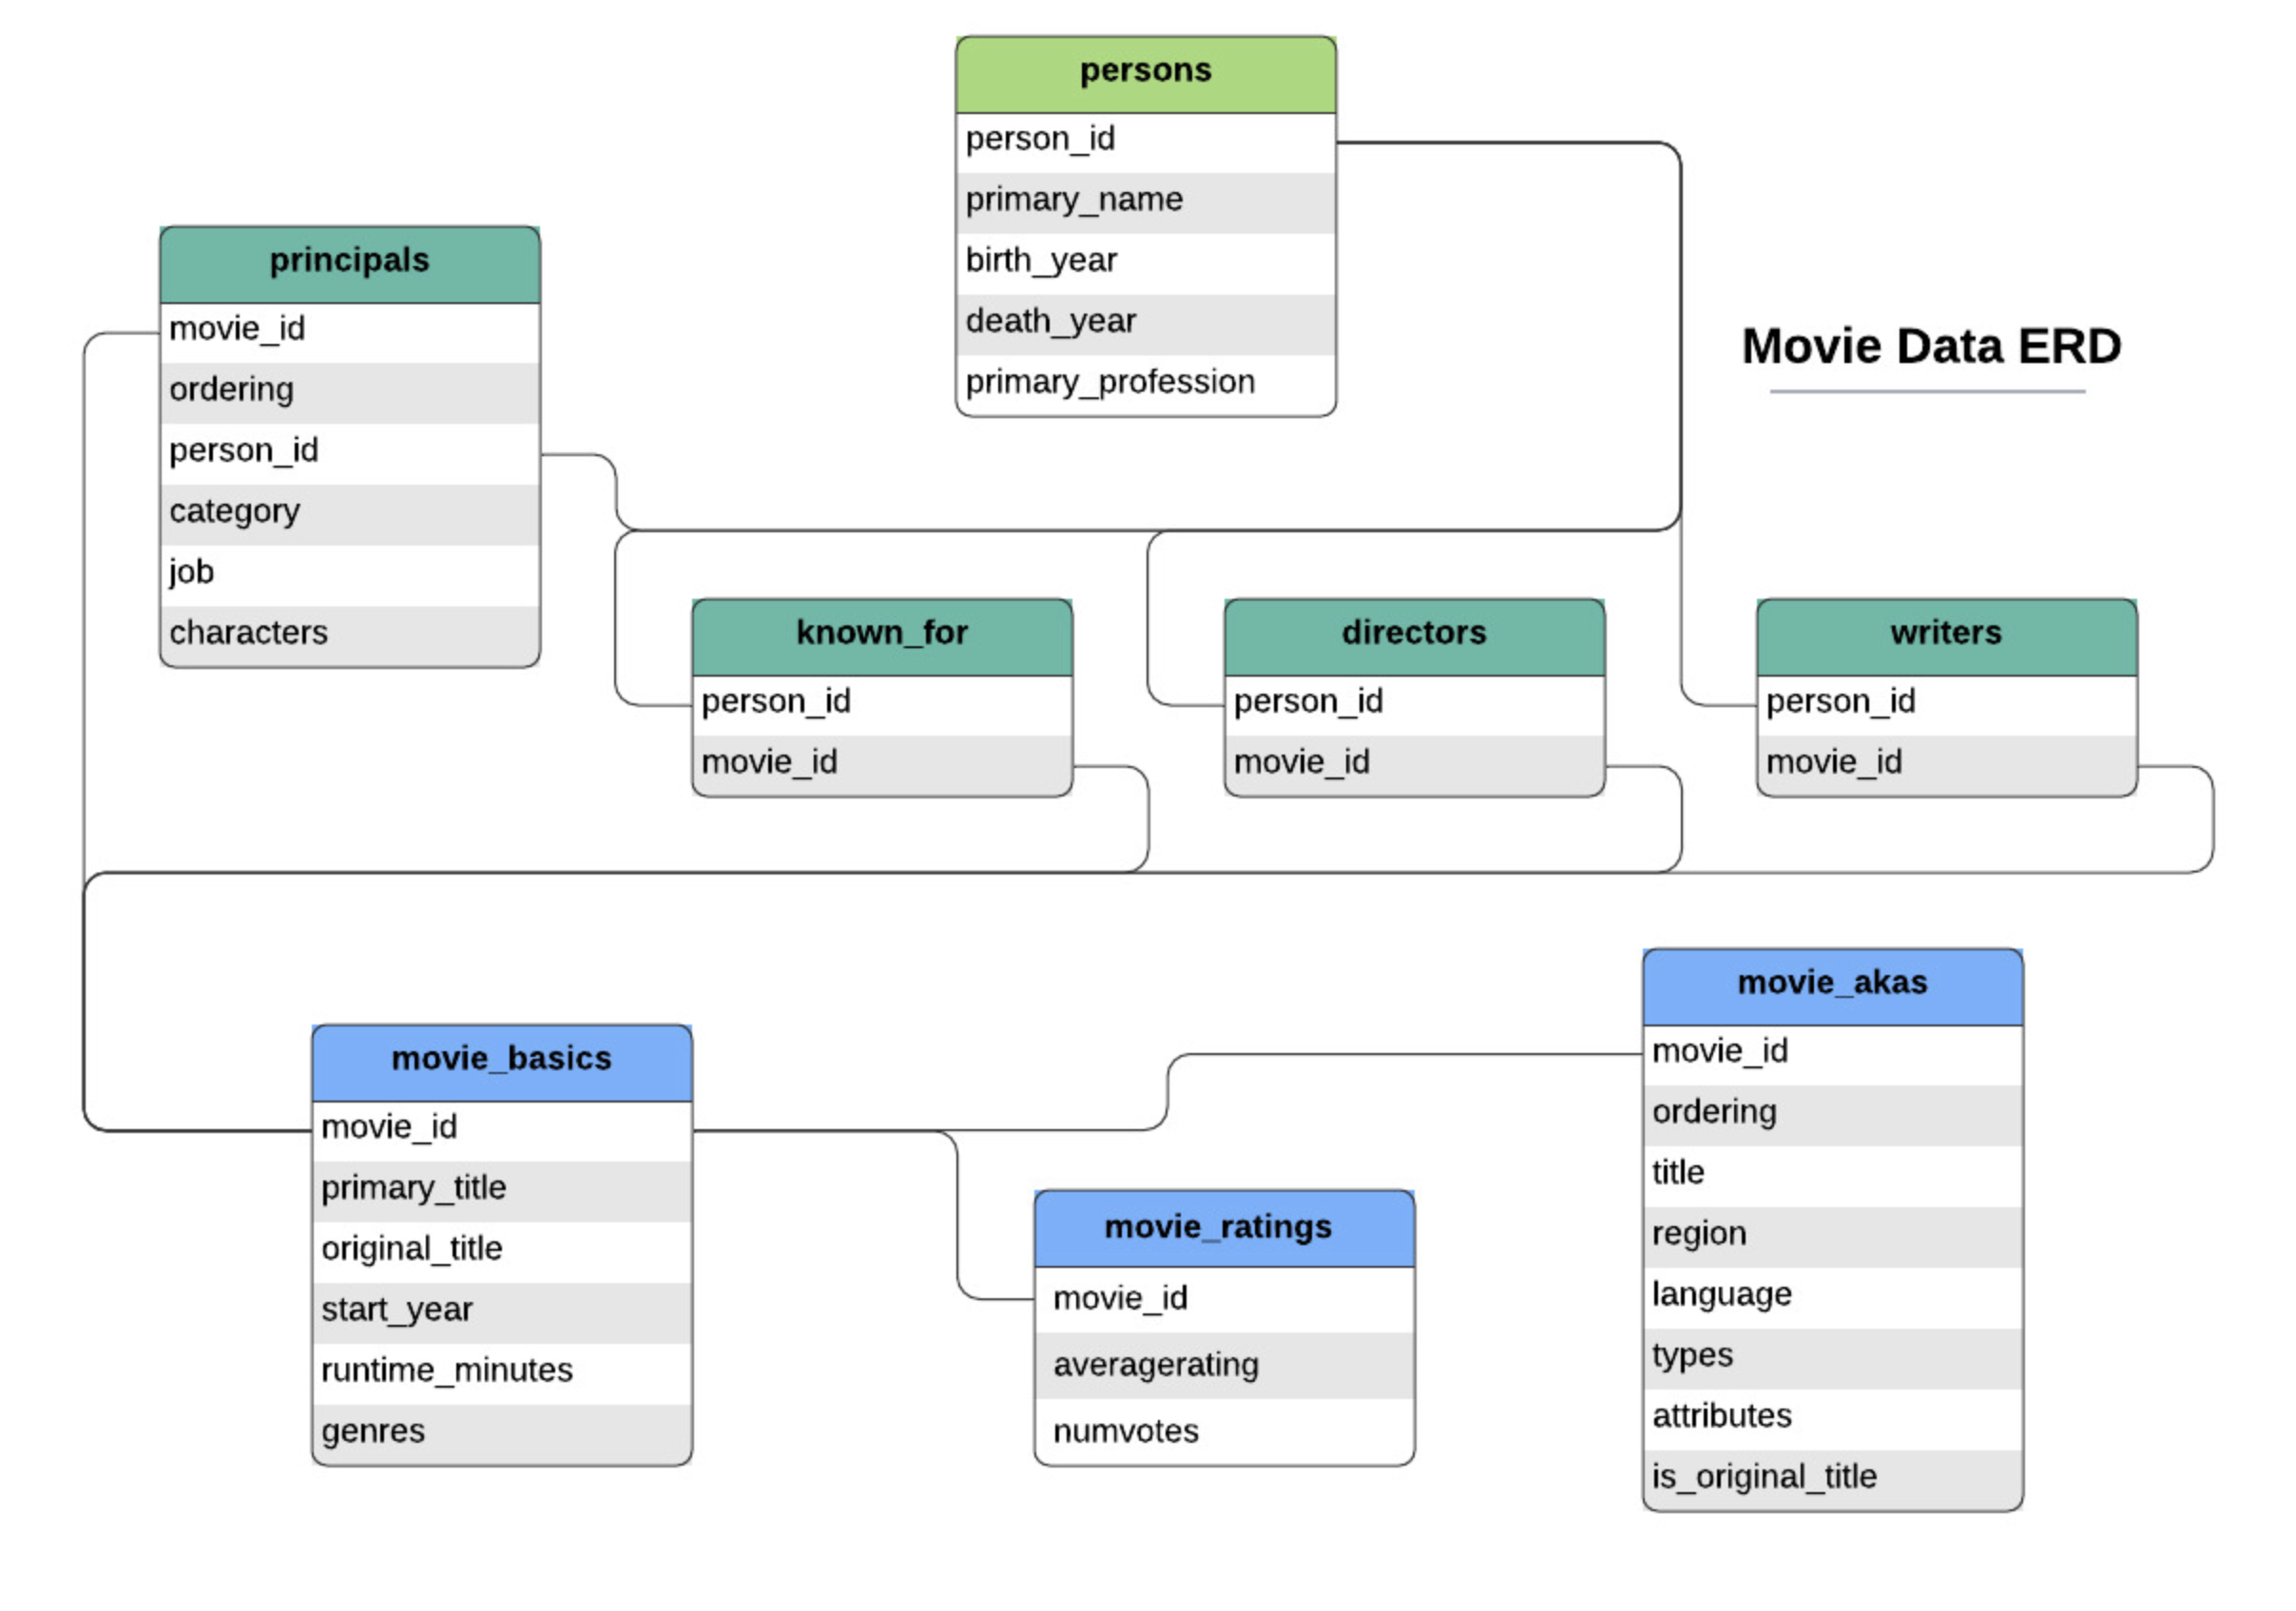

### Importing Data

In [36]:
# Import of relevant libraries
import pandas as pd 
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.float_format = '{:,.0f}'.format


### Connecting to Dataset

In [37]:
#Loading CSV file
path = '/Users/josphatnjuguna/Documents/MORINGA SCHOOL/Course_Materials/Phase 1/Data'
bom_movies = pd.read_csv('/Users/josphatnjuguna/Documents/MORINGA SCHOOL/Course_Materials/Phase 1/Data/bom.movie_gross.csv')

#Connecting to SQlite database and querying the tables
conn = sqlite3.connect('/Users/josphatnjuguna/Documents/MORINGA SCHOOL/Course_Materials/Phase 1/Data/im.db')
tabe_query_im = ("""SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';""")

pd.read_sql(tabe_query_im, conn)


,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


## DATA UNDERSTANDING

Each record (row) in the dataset for BOM represents a movie production and the sales accrued. Each feature (column) in this dataset is some attribute of that of individual movies. 
The  SQLite database file containing information about the IMDB 

The tables of interest for this project is:

`Movie Basic`: A table containing information about movies produced and their genre.

`Rating`: A table containing the rating of all the movies.


### Requirements

#### 1. Joining the movie basic to Rating table

#### 2. Merging the sqlite dataset to the BOM.csv

#### 3. Cleaning the dataset

#### 4. Querying the data

#### 5. Filtering the data set

I focused on the following features :

**foreign gross**: `This id the revenue from the sale of movies internationally`

**Total gross**: `This is the revenue for sale of the movie locally`

**genre**: `This are the type of movies produced`
```           Adventure, Comedy, Horror

### Quering Tables in im.db database

In [38]:
# Joinning movie basic table and movie rating table

table_query_movie_basic = ("""
                            SELECT *
                            FROM
                                movie_basics;
                            """)
movie_basics =pd.read_sql(table_query_movie_basic, conn)

table_query_movie_ratings = ("""
                            SELECT *
                            FROM
                                movie_ratings;
                            """)

movie_ratings = pd.read_sql(table_query_movie_ratings, conn)

### Understanding the Columns in tables

##### Column information from im.db sqlite3 tables for movie basic and movie rating

In [39]:
# Column information from im.db sqlite3 table for movie basic
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [40]:
# Column information from im.db sqlite3 tables for movie rating
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [41]:
# Column information for Box Office Mojo (bom) movie data
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## DATA PREPARATION

### Joining tables in im.db Database

Two tables from sqlite database (im.db) were joinned to leverage on two fields i.e genre and rating. the tables were left joined to mantain all records from the movie_basic table. the joining was based on the primary key movie_id in movie_basic and foreign key movie_id in movie_rating

In [42]:
movie_im = ("""
                    SELECT original_title AS title, genres, averagerating AS rating, numvotes AS votecount
                    FROM 
                        movie_basics AS m
                    JOIN 
                        movie_ratings AS mr ON m.movie_id = mr.movie_id
                    JOIN
                        directors AS d ON m.movie_id = d.movie_id
                    JOIN
                        persons AS p ON d.person_id = p.person_id;
                    """
                    )
im_movies = pd.read_sql(movie_im, conn)
# conn.close()

### Cleaning Data set from  Box Office Dataset

In [43]:
#Removing commas in the attribute foreign_gross
bom_movies['foreign_gross_without_commas'] = bom_movies['foreign_gross'].str.replace(",", "")
#converting the attribute foreign_gross_without_commas from string to float
bom_movies['foreign_gross_numeric'] = pd.to_numeric(bom_movies['foreign_gross_without_commas'], errors='coerce')

Data from bom movies was merged with the joinned table movie_basic_rating from im.db dabase

In [44]:
# Merging the bom movie dataset with im.db dataset
bom_im_movies_merged = bom_movies.merge(im_movies[['title', 'genres', 'rating']], on='title', how='left')
bom_im_movies_merged


,title,studio,domestic_gross,foreign_gross,year,foreign_gross_without_commas,foreign_gross_numeric,genres,rating
0,Toy Story 3,BV,"415,000,000",652000000,2010,652000000,"652,000,000","Adventure,Animation,Comedy",8
1,Toy Story 3,BV,"415,000,000",652000000,2010,652000000,"652,000,000","Adventure,Animation,Comedy",8
2,Toy Story 3,BV,"415,000,000",652000000,2010,652000000,"652,000,000","Adventure,Animation,Comedy",8
3,Toy Story 3,BV,"415,000,000",652000000,2010,652000000,"652,000,000","Adventure,Animation,Comedy",8
4,Alice in Wonderland (2010),BV,"334,200,000",691300000,2010,691300000,"691,300,000",NaN,NaN
...,...,...,...,...,...,...,...,...,...
8185,Edward II (2018 re-release),FM,"4,800",NaN,2018,NaN,NaN,NaN,NaN
8186,El Pacto,Sony,"2,500",NaN,2018,NaN,NaN,NaN,NaN
8187,The Swan,Synergetic,"2,400",NaN,2018,NaN,NaN,NaN,NaN
8188,An Actor Prepares,Grav.,"1,700",NaN,2018,NaN,NaN,Comedy,5


In [45]:
# Getting info from the joinned dataser
bom_im_movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         8190 non-null   object 
 1   studio                        8183 non-null   object 
 2   domestic_gross                8143 non-null   float64
 3   foreign_gross                 5526 non-null   object 
 4   year                          8190 non-null   int64  
 5   foreign_gross_without_commas  5526 non-null   object 
 6   foreign_gross_numeric         5526 non-null   float64
 7   genres                        6935 non-null   object 
 8   rating                        6939 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 639.8+ KB


### Cleaning the merged data from bom movies and im.db movies

From the above information on the merged dataset we have missing data on the columns; studio, domestic_gross, foreign_gross, genre, and rating. the missing values were dropped since the remaining dataset of 2244 records will be sufficient for our EDA. 

In [46]:
# Cleaning the data by dropping the missing values
merged_movies = bom_im_movies_merged.dropna()
merged_movies = merged_movies.copy()

## ANALYSIS

### Engineering and new Feature
A new feature `total_gross` was created  which represents the sum of domestic_gross and foreign_gross

In [47]:
# Creating the total_gross column from domestic gross and foreign gross
merged_movies['total_gross'] = merged_movies['domestic_gross'] + merged_movies['foreign_gross_numeric']
merged_movies

,title,studio,domestic_gross,foreign_gross,year,foreign_gross_without_commas,foreign_gross_numeric,genres,rating,total_gross
0,Toy Story 3,BV,"415,000,000",652000000,2010,652000000,"652,000,000","Adventure,Animation,Comedy",8,"1,067,000,000"
1,Toy Story 3,BV,"415,000,000",652000000,2010,652000000,"652,000,000","Adventure,Animation,Comedy",8,"1,067,000,000"
2,Toy Story 3,BV,"415,000,000",652000000,2010,652000000,"652,000,000","Adventure,Animation,Comedy",8,"1,067,000,000"
3,Toy Story 3,BV,"415,000,000",652000000,2010,652000000,"652,000,000","Adventure,Animation,Comedy",8,"1,067,000,000"
6,Inception,WB,"292,600,000",535700000,2010,535700000,"535,700,000","Action,Adventure,Sci-Fi",9,"828,300,000"
...,...,...,...,...,...,...,...,...,...,...
7993,I Still See You,LGF,"1,400",1500000,2018,1500000,"1,500,000","Fantasy,Thriller",6,"1,501,400"
8015,The Catcher Was a Spy,IFC,"725,000",229000,2018,229000,"229,000","Biography,Drama,War",6,"954,000"
8016,The Catcher Was a Spy,IFC,"725,000",229000,2018,229000,"229,000","Biography,Drama,War",6,"954,000"
8059,Time Freak,Grindstone,"10,000",256000,2018,256000,"256,000","Comedy,Drama,Romance",6,"266,000"


### Computation of Statistics
#### Person's Correlation coefficient
The person's correlation coefficient of the revenue generated from movies and the rating

In [54]:
# Calculating Person's correlation coefficient
CorrCoeff_revenue_rating = merged_movies['total_gross'].corr(merged_movies['rating'])
print(f"The correlation coefficient between movie revenue and rating is {CorrCoeff_revenue_rating}.") 
print("This is a weak association, suggesting that rating alone may not be a strong indicator of movie performance.")

The correlation coefficient between movie revenue and rating is 0.2978629906026036.
This is a weak association, suggesting that rating alone may not be a strong indicator of movie performance.


#### Measures of central tenderncies and Measures of dispersion
Other measures of central tendencies and dispersion were computed as below

In [49]:
#  Using describe method to get the statistics for measures of central tendencies and dispersion
merged_movies.describe()

,domestic_gross,year,foreign_gross_numeric,rating,total_gross
count,"4,819","4,819","4,819","4,819","4,819"
mean,"72,559,572","2,014","112,780,888",6,"185,340,460"
std,"105,208,275",3,"171,676,679",1,"261,191,697"
min,700,"2,010",600,2,"10,800"
25%,"6,050,000","2,011","7,400,000",6,"17,300,000"
50%,"32,200,000","2,013","30,400,000",6,"68,900,000"
75%,"90,400,000","2,016","130,900,000",7,"229,000,000"
max,"700,100,000","2,018","946,400,000",9,"1,405,400,000"


In [50]:
print("The statistics on the revenue earned in the cource of nine years indicate that stardard devition is, \n ", 
merged_movies['total_gross'].std(), " mean is", merged_movies['total_gross'].mean(), "and median is", merged_movies['total_gross'].median())

The statistics on the revenue earned in the cource of nine years indicate that stardard devition is, 
  261191696.8803178  mean is 185340460.47250468 and median is 68900000.0


## VISUALIZATION
### VISUALIZING INCOME FOR STUDIO 
A Bar Chart visualizing the income percentages of studios in the production of movies between 2010 and 2018 was created as shown below 

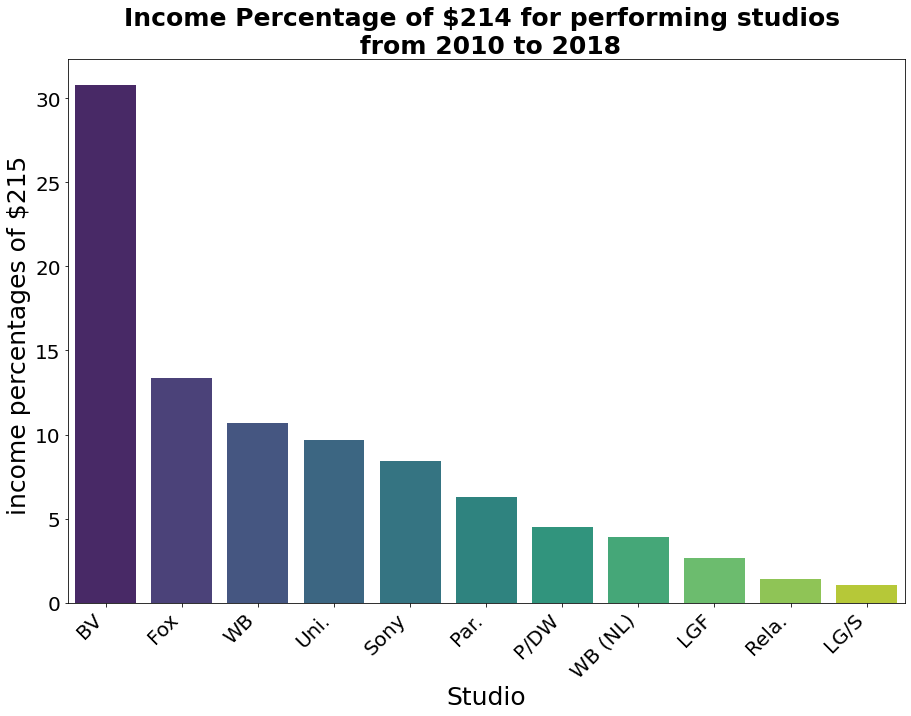

In [55]:


#grouping by studio and aggregating by sum of total gross
merged_movies_group_studios = merged_movies.groupby('studio').sum().sort_values('total_gross', ascending=False).reset_index()

merged_movies_group_studios['percentage_income'] = (merged_movies_group_studios['total_gross']/merged_movies_group_studios['total_gross'].sum())*100

#Filtering studios earning more than 1% of $ 214 in the nine years
merged_movies_grouped_filtered = merged_movies_group_studios.loc[merged_movies_group_studios['percentage_income'] > 1]
merged_movies_grouped_filtered

# Setting the figure and the axes
fig, ax = plt.subplots(figsize=(15,10))

colors = sns.color_palette("viridis", len(merged_movies_grouped_filtered))

# Create a grouped bar chart
sns.barplot(
    x='studio', 
    y='percentage_income', 
    data=merged_movies_grouped_filtered,
    palette=colors
    )


# # customizing the plot by adding title, and axis label
plt.title("Income Percentage of $214 for performing studios \n from 2010 to 2018", fontsize=25, fontweight='bold')
plt.xlabel('Studio', fontsize=25)
plt.ylabel('income percentages of $215 ', fontsize=25)

# Increasing the size of the tick labels
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Tilt the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

### VISUALIZATION
#### HISTOGRAM
A histogram for visualizing the total gross income in producing movies between 2010 and 2018 was created as shown below 

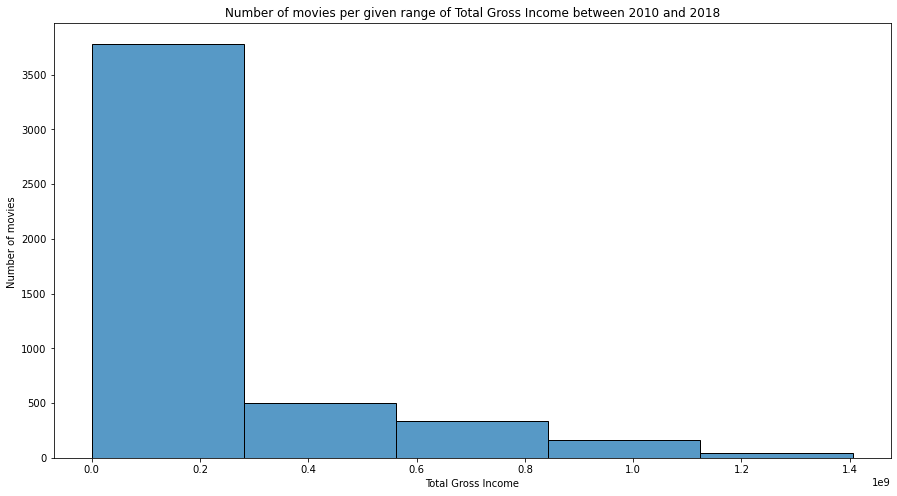

In [51]:
# Setting the figure and the axes
fig, ax = plt.subplots(figsize=(15,8))

# Seaborn for plotting
sns.histplot(data= merged_movies['total_gross'], bins=5)

# customizing the plot by adding title, and axis label
plt.title('Number of movies per given range of Total Gross Income between 2010 and 2018')
plt.xlabel('Total Gross Income')
plt.ylabel('Number of movies ')

plt.show()

It is observed from the visualization above  that the distribution of the total gross income is heavily skewed to the right. This indicate there are few selected movies that generate very high revenue whereas the majority of movies produced generate low revenues.

## Filtering Movies with High Income Range
In order to answer the objective on determinining the type or genre of movies with the highest income ranges, the merged dataset were filtered based on the  total_gross column with an annual income range greater than one billion USD

In [52]:
#Filtering movies with high income range of more than 1 billion USD 
high_income_movies = merged_movies.loc[merged_movies['total_gross'] > 1000000000].reset_index()

#Grouping the high income generating movies based on their genres and aggregating them by count 
genre_high_income_movies = high_income_movies.groupby('genres').count().sort_values('title', ascending=False).reset_index()
genre_high_income_movies

#Listing the top three genres based on their frequency
top_three_genres = genre_high_income_movies.iloc[:3]['genres'].tolist()
top_three_genres

print(f'The set of genres  with high income ranges is {top_three_genres[0]}\n' 
      f'the second set of genres with the second highest income range is {top_three_genres[1]}\n'
      f'and the third is {top_three_genres[0]}')

The set of genres  with high income ranges is Adventure,Animation,Comedy
the second set of genres with the second highest income range is Action,Adventure,Sci-Fi
and the third is Adventure,Animation,Comedy


## SUMMARY

This project analyze current film industry trends to provide actionable insights for Microsoft’s new movie studio, guiding the decision-making process on the types of films to produce for successful box office performance. From the EDA several steps were undertaken which include; connecting to the sqlite database and the csv dataset from im.db and bom respectively. relevant tables from database were joinned and a pandas dataframe was created from it. Similarly a pandas dataframe was created from the bom csv dataframe. The two were joined and cleanned. Statistics and visualization were generated to aid in understanding whether there is any inherent relationship using person's correlation coefficient and other measures of central tendencies and dispersion to understand the distribution of the data. The dataset were filtered based on their perfomance in terms of movies with high income ranges. Finally the type or genre with the high income range was selected from the filtered data.
